In [2]:
import numpy as np
import string
import pandas as pd
import pickle
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from utils import random_idx
from utils import utils

k = 5000
N = 10000
# cluster_sizes is mapping to n-gram size
# cluster_sz in random_idx referring to specific element (int) in cluster_sizes, array
cluster_sizes = [1, 2, 3, 4, 5, 6, 7, 8]
ordered = 1
#assuming this is the alphabet bc of precedent in generate_text.py
#alph = 'abc' 
alph = string.lowercase + ' '

# create language vector for Alice in Wonderland made of summed n-gram vectors for each
# n in cluster_sizes
def create_lang_vec(cluster_sizes, N=N, k=k):
    total_lang = np.zeros((1,N))
    # generate english vector
    for cz in cluster_sizes:
        lang_vector = random_idx.generate_RI_text_fast(N, RI_letters, cz, ordered, "preprocessed_texts/english/alice_in_wonderland.txt", alph)
        total_lang += lang_vector
    return total_lang

def plot_letter_frequencies(frequencies, title):
    x = np.linspace(0, 26, num=26)
    labels = [letter for letter in alph]
    plt.figure()
    plt.bar(x, frequencies)
    plt.xticks(x, labels, rotation='horizontal')
    plt.xlabel('Letters')
    plt.ylabel('Frequencies')
    plt.title(title)
    plt.show()

RI_letters = random_idx.generate_letter_id_vectors(N, k, alph)
# lang_vectors in sizes 1-8
lang_vectors = []
for size in cluster_sizes:
    lang_vectors.append(create_lang_vec([size]))
lang_vectors.insert(0, np.zeros((1,N)))



height has been deprecated.

2016-11-05 23:00


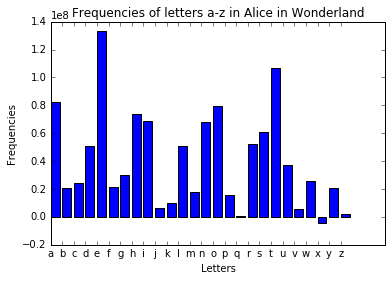

[[ 2220264.]]
[[ 1798104.]]
[[ 3385560.]]


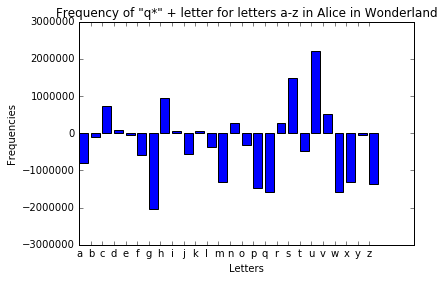

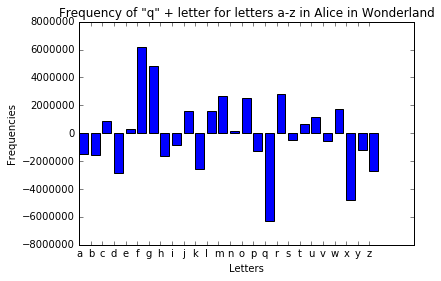

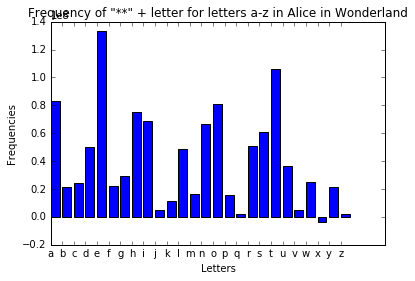

[[  8.79165827e+11]]


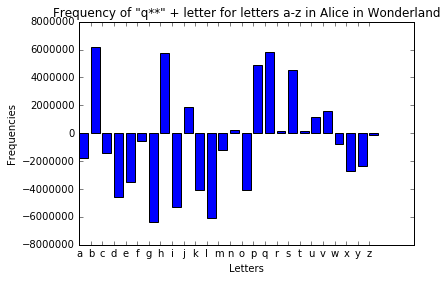

[[  1.87498751e+10]]


In [3]:
"""
Take the language vector representing single letters of
Alice and compute its dot product with the 26 different
letter vectors.  Can you see a relation between the dot
products and the letter counts in Alice?  Alice has
about 300 instances of 'q'.  I'd expect a dot product
with the Q-vector to be around 3 million.
"""
frequencies = []
for i in range(26):
    result = np.dot(lang_vectors[1], RI_letters[i])
    frequencies.append(result)
plot_letter_frequencies(frequencies, 'Frequencies of letters a-z in Alice in Wonderland')
"""
Then take the language vector representing the bigrams
of Alice and compute its dot product with QU.  What do
you get?  And what is this language vector's dot
product with Q?
"""
qu_vector = random_idx.id_vector(N, "qu", alph, RI_letters, ordered)
result = np.dot(lang_vectors[2], np.transpose(qu_vector))
print result

"""
Next, add the two language vectors into a single vector
that represents both individual letters and bigrams.
Compute its dot product with Q and with QU.  What do
you get?
"""
cluster2 = np.add(lang_vectors[1], lang_vectors[2])
q_vector = random_idx.id_vector(N, "q", alph, RI_letters, ordered)

print np.dot(cluster2, q_vector.T)
print np.dot(cluster2, qu_vector.T)
"""
Take the language vector for
bigrams and (pointwise) multiply it with sQ (Q shifted
once).  Compare the resulting vector (with dot product
or cosine) to the letter vectors A, B, C, ....  Which
letter wins?  Do the same using the language vector for
individual letters, and once more using a language
vector that is the sum of the above two.
"""
sQ = np.roll(RI_letters[alph.find("q")], 1)
bigrams_sQ = np.multiply(lang_vectors[2], sQ)
frequencies = []
for i in range(26):
    result = np.dot(RI_letters[i], np.transpose(bigrams_sQ))
    frequencies.append(result)
plot_letter_frequencies(frequencies, 'Frequency of "q*" + letter for letters a-z in Alice in Wonderland')

frequencies = [] 
single_sQ = np.multiply(lang_vectors[1], sQ)
for i in range(26):
    result = np.dot(RI_letters[i], np.transpose(single_sQ))
    frequencies.append(result)
plot_letter_frequencies(frequencies, 'Frequency of "q" + letter for letters a-z in Alice in Wonderland')

"""
Make a language vector
that combines individual letters, bigrams and trigrams:
just add those three language vectors into a single
vector (by normal vector addition.). Then test it for
single letters and bigrams as above.  Also, multiply it
with sQ and test the result as above.  The dot products
should be close to what you got before.
"""
cluster3 = np.add(cluster2, lang_vectors[3])
frequencies = []
for i in range(26):
    result = np.dot(cluster3, RI_letters[i])
    frequencies.append(result)
plot_letter_frequencies(frequencies, 'Frequency of "**" + letter for letters a-z in Alice in Wonderland')
    
print np.dot(cluster3, np.transpose(lang_vectors[2]))

ssQ = np.roll(RI_letters[alph.find("q")], 2)
cluster3_ssQ = np.multiply(cluster3, ssQ)
frequencies = []
for i in range(26):
    frequencies.append(np.dot(cluster3_ssQ, RI_letters[i]))
plot_letter_frequencies(frequencies, 'Frequency of "q**" + letter for letters a-z in Alice in Wonderland')

print np.dot(cluster3_ssQ, np.transpose(lang_vectors[2]))

### Not used in writeup
""" 
All should be around 1.2 billion, I think.
Some of the dot products with letter vectors are very
large negative (-362566580680).  You could be
multiplying vectors when you should be adding them.
"""
# What is the dot product of the single-letter language vector with itself?
result = np.dot(lang_vectors[1], np.transpose(lang_vectors[1]))
# What is the dot product of the bigrams vector with itself?
result = np.dot(lang_vectors[2], np.transpose(lang_vectors[1]))
# What is the dot product of the bigrams vector with the sum of 
# the the single-letter vector and the bigrams vector?
result = np.dot(lang_vectors[2], np.transpose(cluster2))